We will be working on airbnb data released by Inside AirBnB. we'll be working with their dataset from October 3, 2015 on the listings from Washington, D.C.

Here are the columns in the dataset:
    

host_response_rate: the response rate of the host
    
host_acceptance_rate: number of requests to the host that convert to rentals
    
host_listings_count: number of other listings the host has
    
latitude: latitude dimension of the geographic coordinates
    
longitude: longitude part of the coordinates
    
city: the city the living space resides
    
zipcode: the zip code the living space resides
    
state: the state the living space resides
    
accommodates: the number of guests the rental can accommodate
    
room_type: the type of living space (Private room, Shared room or Entire home/apt
                                     
bedrooms: number of bedrooms included in the rental
                                     
bathrooms: number of bathrooms included in the rental
                                     
beds: number of beds included in the rental
                                     
price: nightly price for the rental
                                     
cleaning_fee: additional fee used for cleaning the living space after the guest leaves
                                     
security_deposit: refundable security deposit, in case of damages
                                     
minimum_nights: minimum number of nights a guest can stay for the rental
                                     
maximum_nights: maximum number of nights a guest can stay for the rental
                                     
number_of_reviews: number of reviews that previous guests have left

In [38]:
import pandas as pd

dc_listings = pd.read_csv("Machine Learning\\K-nearest Neighbours\\dc_airbnb.csv")


In [39]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [40]:
# Calculate Euclidean distance between our living space, which can accommodate 3 people using just one feture

first_acc_value = dc_listings.iloc[0]["accommodates"]
our_acc_value = 3 
edist_one =  abs(first_acc_value - our_acc_value)

In [41]:
import numpy as np
dc_listings["distance"] = dc_listings["accommodates"].apply(lambda x: np.abs(3-x))

print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


In [42]:
# randomly pick top 5 living spaces for 5 nearest neighbours
import random
random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values("distance")


print(dc_listings[0:10][["accommodates","price"]])



      accommodates    price
3163             3  $126.00
3128             3  $100.00
108              3   $89.00
710              3   $89.00
3144             3  $125.00
1573             3  $100.00
1737             3  $140.00
2500             3  $150.00
176              3  $119.00
2327             3  $115.00


In [43]:
# remove $ and commas from price column using regex and convert to float
import re
dc_listings["mod_price"]=dc_listings["price"].apply(lambda x: float(re.sub('[$,]','',x)))
print(dc_listings.head())


     host_response_rate host_acceptance_rate  host_listings_count  \
3163                80%                  73%                    1   
3128                80%                  NaN                    1   
108                100%                 100%                    1   
710                 99%                  96%                   32   
3144               100%                  95%                    1   

      accommodates        room_type  bedrooms  bathrooms  beds    price  \
3163             3  Entire home/apt       1.0        1.0   1.0  $126.00   
3128             3  Entire home/apt       0.0        1.0   2.0  $100.00   
108              3      Shared room       1.0        1.0   3.0   $89.00   
710              3  Entire home/apt       1.0        1.0   2.0   $89.00   
3144             3  Entire home/apt       1.0        1.0   1.0  $125.00   

     cleaning_fee    ...     minimum_nights  maximum_nights  \
3163       $60.00    ...                  2            1125   
3128    

In [44]:
# remove $ and commas from price column using str accessor
# convert to float
dc_listings["price"] = dc_listings["price"].str.replace('$','')
dc_listings["price"] = dc_listings["price"].str.replace(',','').astype('float')


In [45]:

mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)


105.8


In [46]:
# write funtion to predict prices
dc_listings = pd.read_csv("C:\\Users\\Shiva\\Documents\\Shiva\\Data_Science_Tutorials\\Dataquest\\Machine Learning\\K-nearest Neighbours\\dc_airbnb.csv")
dc_listings["price"]=dc_listings["price"].apply(lambda x: float(re.sub('[$,]','',x)))
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(listing_bedrooms):
    import numpy as np
    temp_df = dc_listings
    temp_df["distance"] = np.abs(listing_bedrooms - dc_listings["accommodates"])
    temp_df = temp_df.sort_values("distance")
    mean = temp_df[0:5]["price"].mean()
    return mean

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)
print(acc_one, acc_two, acc_four)
    


67.4 132.8 160.8


In [47]:
# Evaluating Model using train/test validation

import numpy as np
import pandas as pd

dc_listings = pd.read_csv("C:\\Users\\Shiva\\Documents\\Shiva\\Data_Science_Tutorials\\Dataquest\\Machine Learning\\K-nearest Neighbours\\dc_airbnb.csv")
dc_listings["price"]=dc_listings["price"].apply(lambda x: float(re.sub('[$,]','',x)))


train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

train_df.is_copy = False
test_df.is_copy = False

def predict_price(listing_bedrooms):
    import numpy as np
    temp_df = train_df
    temp_df["distance"] =  temp_df["accommodates"].apply(lambda x: np.abs(listing_bedrooms - x))
    temp_df = temp_df.sort_values("distance")
    mean = temp_df[0:5]["price"].mean()
    return mean


test_df["predicted_price"] = test_df["accommodates"].apply(predict_price)
print(test_df[["accommodates","price","predicted_price"]].head())




      accommodates  price  predicted_price
2792             2  120.0            104.0
2793             3  140.0            177.4
2794             4  299.0            145.8
2795             3   85.0            177.4
2796             6  175.0            187.2


In [48]:
# Calucalte mean absolute error
import numpy as np
def calc_error(row):
    return np.abs(row["predicted_price"]-row["price"])
    
test_df["error"]=test_df.apply(calc_error,axis=1)
mean_error = sum(test_df["error"])/len(test_df["error"])

print(mean_error)

56.2900107411


In [49]:
# Calucalte mean squared error
import numpy as np
    
test_df["squared_error"]=np.abs(test_df["predicted_price"]-test_df["price"]) ** 2
mean_squared_error = test_df["squared_error"].mean()

print(mean_squared_error)

18646.525370569325


In [50]:
# Train another model using bathrooms colums

import numpy as np
import pandas as pd
dc_listings = pd.read_csv("C:\\Users\\Shiva\\Documents\\Shiva\\Data_Science_Tutorials\\Dataquest\\Machine Learning\\K-nearest Neighbours\\dc_airbnb.csv")
dc_listings["price"]=dc_listings["price"].apply(lambda x: float(re.sub('[$,]','',x)))
test_df2 = dc_listings.iloc[0:2792]
train_df2 = dc_listings.iloc[2792:]

test_df2.is_copy = False
train_df2.is_copy = False

def predict_price2(listing_baths):
    temp_df = train_df
    temp_df["distance"] = np.abs(temp_df["bathrooms"] - listing_baths)
    temp_df = temp_df.sort_values("distance")
    mean = temp_df.iloc[0:5]['price'].mean()
    return mean


train_df2["predicted_price2"] = train_df2["bathrooms"].apply(predict_price2)  

train_df2["squared_error2"] = np.abs(train_df2["predicted_price2"] - train_df2["price"]) ** 2

squared_error2_mean = train_df2["squared_error2"].mean()
print(squared_error2_mean)




18405.444081632548


In [51]:
# calcualte how far off the model's predictions with true value:
# root mean square

root_mean_baths = squared_error2_mean ** (1/2)
root_mean_baths


135.6666653295221

In [52]:
# clean up data to calculate multivariable k nearest neighbours

dc_listings = pd.read_csv("Machine Learning\\K-nearest Neighbours\\dc_airbnb.csv")
dc_listings["price"]=dc_listings["price"].apply(lambda x: float(re.sub('[$,]','',x)))
print(dc_listings.info())
drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
print(dc_listings.info())
print(dc_listings.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), object(

In [53]:
# remove missing rows
dc_listings = dc_listings.drop(['cleaning_fee','security_deposit'],axis=1)
dc_listings = dc_listings.dropna()
print(dc_listings.info())
print(dc_listings.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 0 to 3722
Data columns (total 8 columns):
accommodates         3671 non-null int64
bedrooms             3671 non-null float64
bathrooms            3671 non-null float64
beds                 3671 non-null float64
price                3671 non-null float64
minimum_nights       3671 non-null int64
maximum_nights       3671 non-null int64
number_of_reviews    3671 non-null int64
dtypes: float64(4), int64(4)
memory usage: 258.1 KB
None
accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [54]:
# Normalize all the feature columns in the listings except price
norm_listing = (dc_listings - dc_listings.mean())/dc_listings.std()
norm_listing["price"] = dc_listings["price"]

In [55]:
# calcualte euclidean distance betwewn two rows in our datset using scipy
from scipy.spatial import distance
first_list =  norm_listing.iloc[0][["accommodates","bathrooms"]]
second_list =  norm_listing.iloc[1][["accommodates","bathrooms"]]
dist = distance.euclidean(first_list,second_list)

In [56]:
# using scikit-learn library to predict using multivariate K-nearest neighbors with 2 features
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,algorithm='brute',metric='euclidean')
train_df = norm_listing.iloc[0:2792]
test_df = norm_listing.iloc[2792:]
test_df.is_copy = False
train_df.is_copy = False
features = ['accommodates','bathrooms']
knn.fit(train_df[features],train_df['price'])
test_df["prediction"] = knn.predict(test_df[features])
test_df[["price","prediction"]].head(10)


,price,prediction
2839,25.0,62.8
2840,60.0,120.2
2841,149.0,91.0
2842,136.0,305.6
2843,90.0,120.2
2844,95.0,120.2
2845,750.0,266.6
2846,95.0,120.2
2847,80.0,91.0
2848,101.0,120.2


In [57]:
# calculate mean suared error and root of mean squared error using scikit-learn library
from sklearn.metrics import mean_squared_error
two_mse = mean_squared_error(test_df["price"],test_df["prediction"])
two_rmse = two_mse ** (1/2)
print(two_mse,two_rmse)

12880.7854835 113.493548202


In [58]:
# using scikit-learn library to predict using multivariate K-nearest neighbors with 5 features
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,algorithm='brute',)
train_df = norm_listing.iloc[0:2792]
test_df = norm_listing.iloc[2792:]
test_df.is_copy = False
train_df.is_copy = False
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
knn.fit(train_df[features],train_df['price'])
test_df["prediction"] = knn.predict(test_df[features])
test_df[["price","prediction"]].head(10)
four_mse = mean_squared_error(test_df["price"],test_df["prediction"])
four_rmse = two_mse ** (1/2)
print(test_df[["price","prediction"]].head(10))
print(four_mse,four_rmse)




      price  prediction
2839   25.0        62.6
2840   60.0       134.6
2841  149.0       137.4
2842  136.0       139.6
2843   90.0       112.8
2844   95.0       121.6
2845  750.0       323.0
2846   95.0       109.2
2847   80.0       114.8
2848  101.0       103.6
12540.9176792 113.493548202


In [75]:
# optimize hyperparameters 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for i in range(1,21):
    knn = KNeighborsRegressor(algorithm = 'brute', n_neighbors = i)
    knn.fit(train_df[features],train_df['price'])
    predict = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'],predict)
    mse_values.append(mse)
    
print(mse_values)    
    

[29237.998862343571, 17267.729806598407, 13348.968777651373, 12628.648321956769, 12540.91767918089, 11894.373435722411, 11447.417264516731, 11447.519891211605, 11118.453615921571, 11287.735073947666, 11222.127201271169, 11313.0774475414, 11358.858311287033, 11229.788070859744, 11221.134425483504, 11366.136460999716, 11264.874054741347, 11302.93907217798, 11420.455948115303, 11421.859573378841]


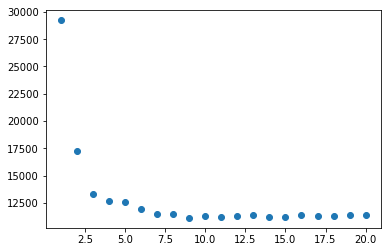

In [77]:
# optimize value is 10
# lets check these values on scatter plot
import matplotlib.pyplot as plt
%matplotlib inline
hyper_params = [x for x in range(1, 21)]
plt.scatter(hyper_params,mse_values)
plt.show()


In [83]:
# create a function to pass multiple features

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
four_features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
all_features = train_df.columns.tolist()
all_features.remove('price')

hyper_params = [x for x in range(1,21)]

two_mse_values = list()
three_mse_values = list()
four_mse_values = list()
all_mse_values = list()

two_hyp_mse = dict()
three_hyp_mse = dict()
four_hyp_mse = dict()
all_hyp_mse = dict()

def knn_regfunct(features):
    mse_list = []
    for i in hyper_params:
        
        knn = KNeighborsRegressor(algorithm = 'brute', n_neighbors = i)
        knn.fit(train_df[features],train_df['price'])
        predict = knn.predict(test_df[features])
        mse = mean_squared_error(test_df['price'],predict)
        mse_list.append(mse)
        
    return mse_list
    

two_mse_values =  knn_regfunct(two_features)  
three_mse_values = knn_regfunct(three_features)  
four_mse_values = knn_regfunct(four_features)  
all_mse_values = knn_regfunct(all_features)  

two_hyp_mse[two_mse_values.index(min(two_mse_values))] = min(two_mse_values)
three_hyp_mse[three_mse_values.index(min(three_mse_values))] = min(three_mse_values)
four_hyp_mse[four_mse_values.index(min(four_mse_values))] = min(four_mse_values)   
all_hyp_mse[all_mse_values.index(min(all_mse_values))] = min(all_mse_values) 

print(two_hyp_mse)
print(three_hyp_mse)
print(four_hyp_mse)
print(all_hyp_mse)

{15: 12131.253528512514}
{5: 12201.339306029578}
{8: 11118.453615921571}
{13: 12021.539539365234}


In [ ]:
{5: 14790.314266211606}
{7: 13518.769009310208}